In [1]:
import pandas as pd
import numpy as np
from xbbg import blp

import string

import sys
sys.path.insert(0, '../cmds')
from utils import *


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

# Parameters

In [2]:
SAVE_DATA = True

STARTDATE = '2000-01-01'
ENDDATE = '2022-12-30'

# Treasury Floaters

In [15]:
SAMPLE_BEGIN = 16
SAMPLE_END = 26
matcodes = [f'04/30/{yr}' for yr in np.arange(SAMPLE_BEGIN,SAMPLE_END)]

ticks = [f'TF {matcode} Govt' for matcode in matcodes]
labels = matcodes
        
map_tick_des = dict(keys=labels,values=ticks)

In [16]:
data = blp.bdh(tickers=ticks, flds='last_price',\
        start_date=STARTDATE, end_date=ENDDATE).droplevel(level=1,axis=1)

data.index = pd.to_datetime(data.index)

data.columns = labels
data.sort_index(axis=1,inplace=True)

In [17]:
info = pd.DataFrame(map_tick_des)
info.columns = ['labels','BB ticker']
info = info.set_index('labels').sort_index()

In [18]:
specs = blp.bdp(ticks,['FLT_SPREAD','OAS_SPREAD_BID','YLD_YTM_MID','LAST_PRICE'])

In [19]:
dataout = data

if SAVE_DATA:
    outfile = f'../data/treasury_floaters.xlsx'
    with pd.ExcelWriter(outfile) as writer:  
        info.to_excel(writer, sheet_name= 'info', index=True)
        dataout.to_excel(writer, sheet_name= 'data', index=True)
        specs.to_excel(writer,sheet_name='specs',index=True)

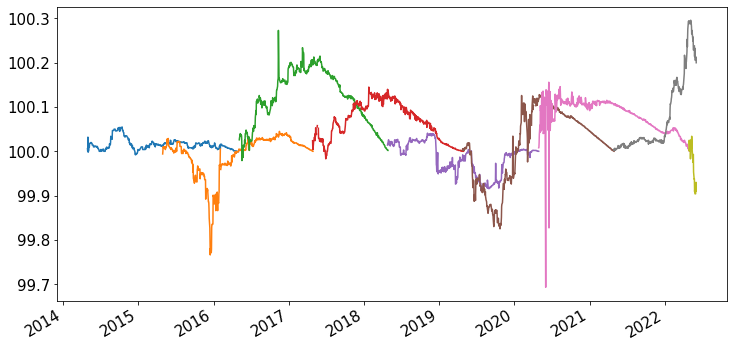


03JUN2022_17:53:33.897 47169:123145623478272 WARN apism_apisession.cpp:1196 Apisession.aliveCheck Alive Request Retries exhausted (2) on [localhost:8194 -> 127.0.0.1:53766] 

03JUN2022_17:53:33.901 47169:123145625075712 WARN blpapi_platformcontroller.cpp:402 blpapi.session.platformcontroller.{1} Connectivity lost, no connected endpoints. 

03JUN2022_17:53:38.904 47169:123145624014848 WARN blpapi_apicmadapter.cpp:346 blpapi.session.transporttcp.apicmadapter.{1} Connection attempt timed out localhost:8194 <127.0.0.1:8194> 

03JUN2022_17:53:38.904 47169:123145624014848 WARN blpapi_platformtransporttcp.cpp:151 blpapi.session.transporttcp.{1}.<localhost:8194> { platformId=0 } 127.0.0.1, session pool state=Failed 

03JUN2022_17:53:46.916 47169:123145624014848 WARN blpapi_apicmadapter.cpp:346 blpapi.session.transporttcp.apicmadapter.{1} Connection attempt timed out localhost:8194 <127.0.0.1:8194> 

03JUN2022_17:53:46.916 47169:123145624014848 WARN blpapi_platformtransporttcp.cpp:151 blpapi.s

In [20]:
data.plot(legend=None)
plt.show()

In [9]:
specs

,flt_spread,oas_spread_bid,yld_ytm_mid,last_price
TF 04/30/17 Govt,7.4,NaN,NaN,NaN
TF 04/30/18 Govt,19.0,NaN,NaN,NaN
TF 04/30/19 Govt,7.0,NaN,NaN,NaN
TF 04/30/20 Govt,3.3,NaN,NaN,NaN
TF 04/30/21 Govt,13.9,NaN,NaN,NaN
TF 04/30/22 Govt,11.4,NaN,NaN,NaN
TF 04/30/23 Govt,3.4,1.344141,0.938537,100.269
TF 04/30/24 Govt,-7.5,10.694865,1.094869,100.003


# Corp Floaters

In [43]:
ticks = ['GS Float 02/23/23 Corp', 'EBAY Float 01/30/23 Corp', 'VZ Float 05/15/25 Corp']
labels = ['Goldman 02/23/23', 'EBAY 01/30/23', 'Verizon 05/15/25']
        
map_tick_des = dict(keys=labels,values=ticks)

In [44]:
data = blp.bdh(tickers=ticks, flds='last_price',\
        start_date=STARTDATE, end_date=ENDDATE).droplevel(level=1,axis=1)

data.index = pd.to_datetime(data.index)

data.columns = labels
data.sort_index(axis=1,inplace=True)

In [45]:
info = pd.DataFrame(map_tick_des)
info.columns = ['labels','BB ticker']
info = info.set_index('labels').sort_index()

In [46]:
specs = blp.bdp(ticks,['FLT_SPREAD','OAS_SPREAD_BID','YLD_YTM_MID','LAST_PRICE'])

In [47]:
dataout = data

if SAVE_DATA:
    outfile = f'../data/corp_floaters.xlsx'
    with pd.ExcelWriter(outfile) as writer:  
        info.to_excel(writer, sheet_name= 'info', index=True)
        dataout.to_excel(writer, sheet_name= 'data', index=True)
        specs.to_excel(writer,sheet_name='specs',index=True)

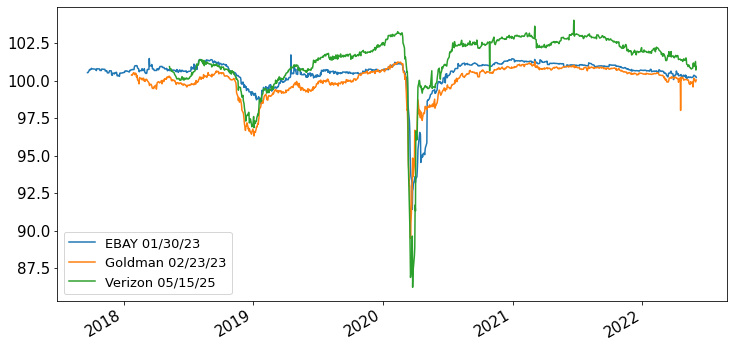

In [48]:
data.plot()
plt.show()

In [49]:
specs

,flt_spread,oas_spread_bid,yld_ytm_mid,last_price
EBAY Float 01/30/23 Corp,87.0,80.648903,2.158195,100.210
GS Float 02/23/23 Corp,75.0,115.379263,2.465909,99.934
VZ Float 05/15/25 Corp,110.0,106.833433,2.416767,100.904


# Index

In [75]:
ticks_bonds = ['BTFLTRUU Index', 'BFRNTRUU Index', 'LDC5TRUU Index']
ticks_fed = ['USGG3M Index']
ticks = ticks_bonds + ticks_fed

labels_bonds = ['BB Treasury FRN Index','BB Corp FRN Index', 'BB Corp Fixed 1-5yr Index']
labels_fed = ['Tbill Rate (13 weeks)']
labels = labels_bonds + labels_fed
        
map_tick_des = dict(keys=labels,values=ticks)

FLDS = ['cpn','yield_to_worst','last_price']
data = blp.bdh(tickers=ticks, flds=FLDS, start_date=STARTDATE, end_date=ENDDATE)

data.index = pd.to_datetime(data.index)

In [76]:
idx = pd.IndexSlice

bonds = data.loc[:,idx[ticks_bonds,'yield_to_worst']].droplevel(level=0,axis=1)
bonds.columns = labels_bonds
cpn = data.loc[:,idx[ticks_bonds,'cpn']].droplevel(level=0,axis=1)
cpn.columns = labels_bonds
ff = data.loc[:,idx[ticks_fed,'last_price']].droplevel(level=0,axis=1)
ff.columns = labels_fed

ylds = pd.concat([bonds,ff],axis=1)

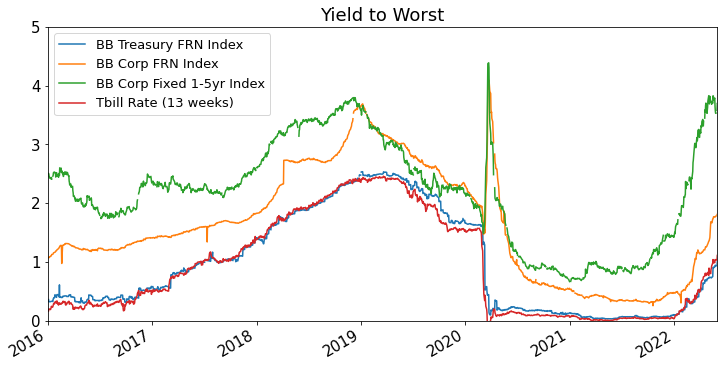

In [77]:
ylds.plot(xlim=('2016-01-01','2022-06-01'),ylim=(0,5),title='Yield to Worst')
plt.show()

In [78]:
cpns = pd.concat([cpn,ff],axis=1)

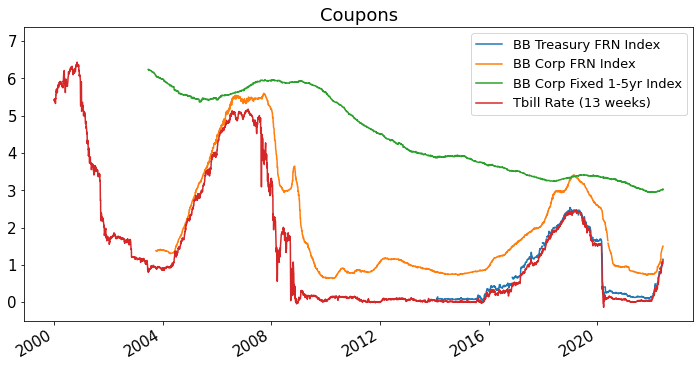

In [79]:
cpns.plot(title='Coupons')
plt.show()

In [121]:
prices = data.loc[:,idx[ticks_bonds,'last_price']].droplevel(level=0,axis=1)
prices.columns = labels_bonds

In [80]:
info = pd.DataFrame(map_tick_des)
info.columns = ['labels','BB ticker']
info = info.set_index('labels').sort_index()

In [122]:
if SAVE_DATA:
    outfile = f'../data/index_floaters.xlsx'
    with pd.ExcelWriter(outfile) as writer:  
        info.to_excel(writer, sheet_name= 'info', index=True)
        prices.to_excel(writer, sheet_name= 'prices', index=True)
        ylds.to_excel(writer, sheet_name= 'yields', index=True)
        cpns.to_excel(writer, sheet_name= 'coupons', index=True)

<AxesSubplot:>

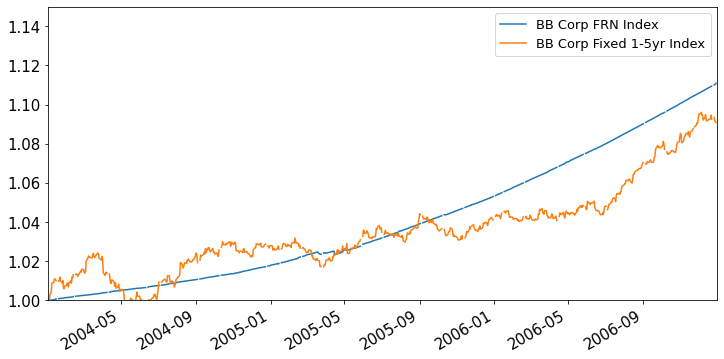

In [117]:
view_date0 = '2004-01-02'
view_date1 = '2006-12-31'

prices_sub = prices.div(prices.loc[view_date0,:])
prices_sub.iloc[:,1:].plot(xlim=(view_date0,view_date1),ylim=(1,1.15))

<AxesSubplot:>

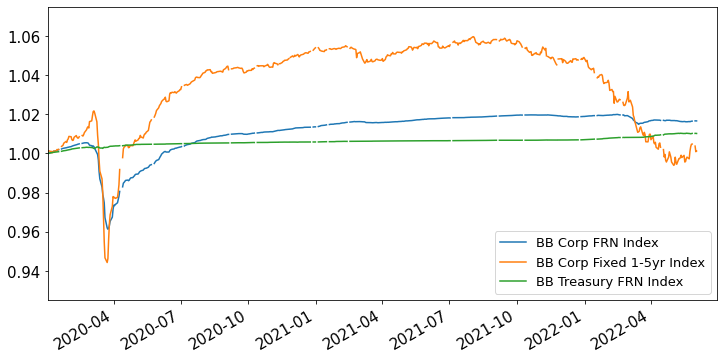

In [120]:
view_date0 = '2020-01-02'
view_date1 = '2022-06-30'

prices_sub = prices.div(prices.loc[view_date0,:])
prices_sub = prices_sub.iloc[:,[1,2,0]]
prices_sub.plot(xlim=(view_date0,view_date1),ylim=(.925,1.075))

<AxesSubplot:>

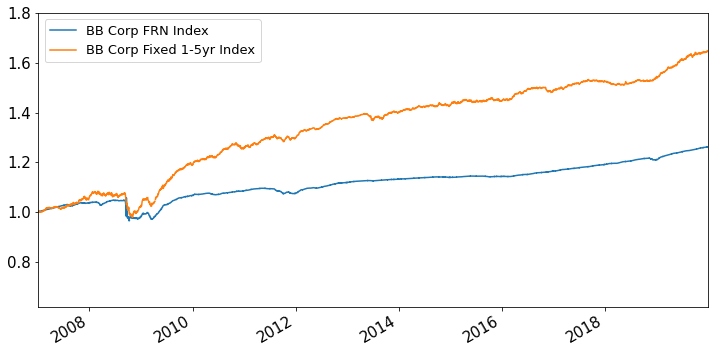

In [118]:
view_date0 = '2007-01-02'
view_date1 = '2019-12-31'

prices_sub = prices.div(prices.loc[view_date0,:])
prices_sub.iloc[:,1:].plot(xlim=(view_date0,view_date1))

# References

https://www.ishares.com/us/literature/brochure/mechanics-of-flot-en-us.pdf

https://www.schwab.com/learn/story/floating-rate-notes-3-things-to-consider